**Enable R by Installing rpy2 with Conda**

In [2]:
!conda install -y rpy2

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - fastai/linux-64::thinc==6.12.1=py37h637b7d7_1000
  - defaults/linux-64::pytest-doctestplus==0.3.0=py37_0
  - defaults/linux-64::jupyter_client==5.2.4=py37_0
  - defaults/linux-64::html5lib==1.0.1=py37_0
  - defaults/linux-64::ipywidgets==7.4.2=py37_0
  - defaults/linux-64::pyopenssl==19.0.0=py37_0
  - defaults/linux-64::bleach==3.1.0=py37_0
  - defaults/linux-64::spyder-kernels==0.4.2=py37_0
  - defaults/linux-64::h5py==2.9.0=py37h7918eee_0
  - defaults/linux-64::singledispatch==3.4.0.3=py37_0
  - defaults/linux-64::cryptography==2.6.1=py37h1ba5d50_0
  - defaults/linux-64::ipython==7.4.0=py37h39e3cac_0
  - defaults/linux-64::multipledispatch==0.6.0=py37_0
  - defaults/linux-64::nb_conda_kernels==2.2.1=py37_0
  - defaults/linux-64::terminado==0.8.1=py37_1
  - defaults/linux-64::pytest-remotedata==0.3.1=py37_0
  - defaults/linux-64::a

**Load the R Extension for iPython**

In [3]:
%load_ext rpy2.ipython

**Keep Track of R Dependencies in Your Home Folder**

In [4]:
!mkdir ~/libs

In [5]:
%%R
options(repos = "http://cran.rstudio.com/")
.libPaths("~/libs")
install.packages("dplyr", quiet=TRUE)

/opt/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: also installing the dependencies ‘cli’, ‘fansi’, ‘pillar’, ‘pkgconfig’, ‘glue’, ‘Rcpp’, ‘rlang’, ‘tibble’, ‘tidyselect’


  warnings.warn(x, RRuntimeWarning)


**Sample Data from BigQuery**

In [6]:
%%bigquery babyweight
SELECT 
  weight_pounds as y, 
  CASE 
    WHEN is_male = true THEN 1
    WHEN is_male = false THEN 0
    ELSE NULL 
    END as is_male, 
  child_race, 
  mother_age, 
  father_age,
  gestation_weeks
FROM `bigquery-public-data.samples.natality`
WHERE weight_pounds IS NOT NULL AND RAND() < 0.0005

In [7]:
%%R -i babyweight
str(babyweight)

'data.frame':	68852 obs. of  6 variables:
 $ y              : num  5.37 8.25 7.25 8 5.82 ...
 $ is_male        : int  1 1 1 1 0 1 0 1 1 0 ...
 $ child_race     : num  9 NaN NaN 1 9 1 9 2 2 2 ...
 $ mother_age     : int  42 42 41 14 47 14 41 14 14 14 ...
 $ father_age     : int  50 99 43 99 51 17 41 99 21 16 ...
 $ gestation_weeks: num  33 39 39 37 38 NaN 31 99 38 99 ...


**Fit a Linear Regression Model Using R**

In [8]:
%%R -i babyweight
mod <- lm(y ~ ., data = babyweight)
summary(mod)


Call:
lm(formula = y ~ ., data = babyweight)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0538 -0.6765  0.0775  0.8105  5.7490 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      6.6897756  0.0346830 192.883  < 2e-16 ***
is_male          0.2720881  0.0112151  24.261  < 2e-16 ***
child_race      -0.0067374  0.0015120  -4.456 8.37e-06 ***
mother_age       0.0197856  0.0009785  20.220  < 2e-16 ***
father_age      -0.0053025  0.0002263 -23.427  < 2e-16 ***
gestation_weeks  0.0052325  0.0003944  13.266  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.303 on 54013 degrees of freedom
  (14833 observations deleted due to missingness)
Multiple R-squared:  0.03234,	Adjusted R-squared:  0.03225 
F-statistic:   361 on 5 and 54013 DF,  p-value: < 2.2e-16



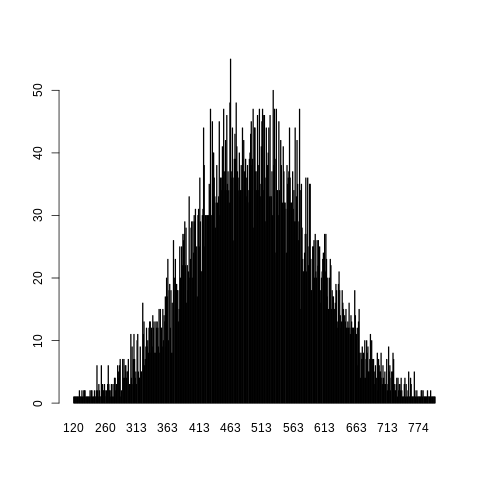

In [9]:
%%R 
n <- floor(rnorm(10000, 500, 100))
t <- table(n)
barplot(t)